In [1]:
#Nowe we want to look at the most optimal skills for data analysts in the US 
#Salary versus lilihood of the skill being in a role as well as group the skills based on technology

#1. Group skills to determine median salary and likelihood of being in posting
#2. Visualising median salary versus percent skill demand



In [2]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import calendar
from matplotlib.ticker import PercentFormatter

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else x)

c:\Users\seane\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df["job_country"] == "United States")].copy()

In [4]:
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])
df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [5]:
# Group job skills on median salary and count

df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending= False)
df_DA_skills = df_DA_skills.rename(columns = {'count': 'skill_count', 'median': 'median_salary'})


#Now need the percentage column

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/ DA_job_count * 100
df_DA_skills

#Only want skills greater than 5% of job postings

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


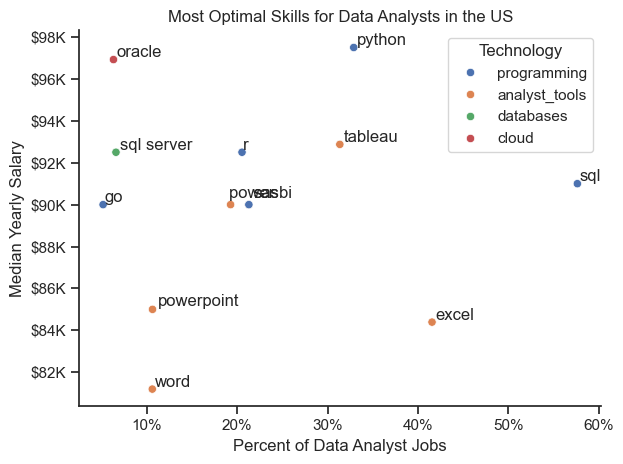

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# Assuming df_DA_skills_tech_high_demand is already defined and loaded with appropriate data

# Create scatter plot
sns.scatterplot(
    data=df_DA_skills_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, row in df_DA_skills_high_demand.iterrows():
    text = plt.text(row['skill_percent'], row['median_salary'], row['skills'])
    texts.append(text)

# Adjust text to avoid overlap, specifying bbox to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'), bbox=dict(pad=0.5, fc='none', ec='none'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

# Format y-axis as thousands and x-axis as percentage
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()


In [7]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['alteryx',
  'msaccess',
  'esquisse',
  'splunk',
  'cognos',
  'word',
  'qlik',
  'visio',
  'excel',
  'ssrs',
  'spreadsheet',
  'nuix',
  'power bi',
  'looker',
  'dax',
  'datarobot',
  'powerpoint',
  'spss',
  'microstrategy',
  'sas',
  'tableau',
  'ms access',
  'sap',
  'outlook',
  'powerbi',
  'sheets',
  'ssis',
  'sharepoint'],
 'programming': ['assembly',
  'powershell',
  'sql',
  'vba',
  'lua',
  'clojure',
  'go',
  'nosql',
  'html',
  'perl',
  'typescript',
  'elixir',
  'pascal',
  'golang',
  'fortran',
  'matlab',
  'python',
  'java',
  'vb.net',
  'visual basic',
  'lisp',
  'sass',
  'haskell',
  'bash',
  'solidity',
  'javascript',
  'css',
  'rust',
  'mongo',
  'c',
  'f#',
  'apl',
  'crystal',
  'objective-c',
  'ruby',
  't-sql',
  'sas',
  'visualbasic',
  'swift',
  'c++',
  'cobol',
  'groovy',
  'delphi',
  'no-sql',
  'php',
  'mongodb',
  'c#',
  'julia',
  'shell',
  'dart',
  'ocaml',
  'kotlin',
  'erlang',
  'r',
  'sc

In [8]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

#Fitlering for jobs greater than 5%
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


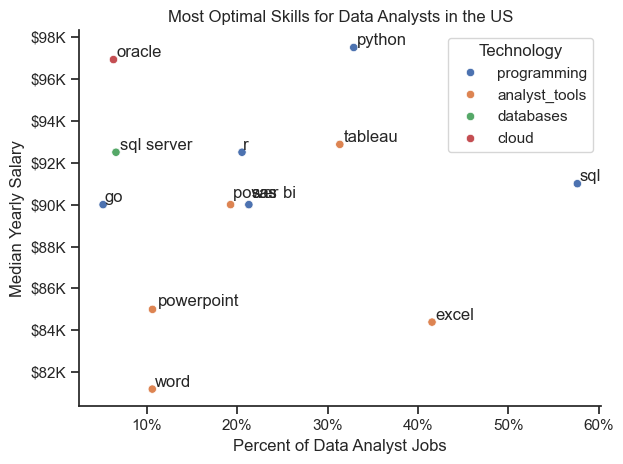

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# Assuming df_DA_skills_high_demand is already defined and loaded with appropriate data

# Create scatter plot
sns.scatterplot(
    data=df_DA_skills_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

# Remove top and right spines from plot
sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, row in df_DA_skills_high_demand.iterrows():
    texts.append(plt.text(row['skill_percent'], row['median_salary'], row['skills']))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

# Format y-axis as thousands and x-axis as percentage
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


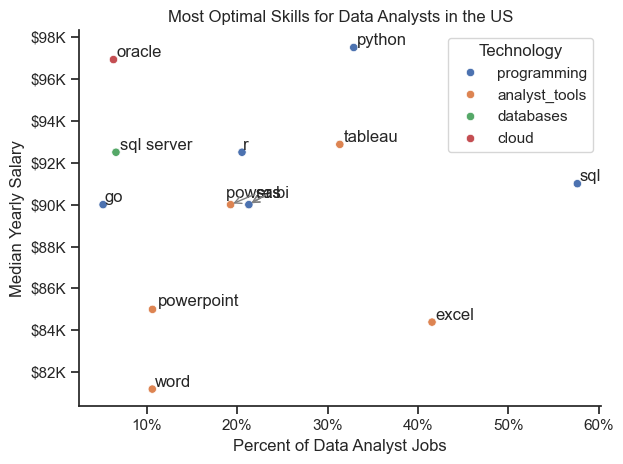

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# Assuming df_DA_skills_high_demand is already defined and loaded with appropriate data

# Create scatter plot
sns.scatterplot(
    data=df_DA_skills_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

# Remove top and right spines from plot
sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, row in df_DA_skills_high_demand.iterrows():
    texts.append(plt.text(row['skill_percent'], row['median_salary'], row['skills']))

# Adjust text to avoid overlap
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='gray'),
    only_move={'points':'y', 'texts':'y'},  # Move texts only along the y-axis
    force_points=0.3,  # Adjust repelling force between points
    force_text=0.3,    # Adjust repelling force between texts
    expand_points=(1.2, 1.4),  # Expand repelling points in the x and y directions
    expand_text=(1.2, 1.4),    # Expand repelling texts in the x and y directions
)

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

# Format y-axis as thousands and x-axis as percentage
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()
